<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




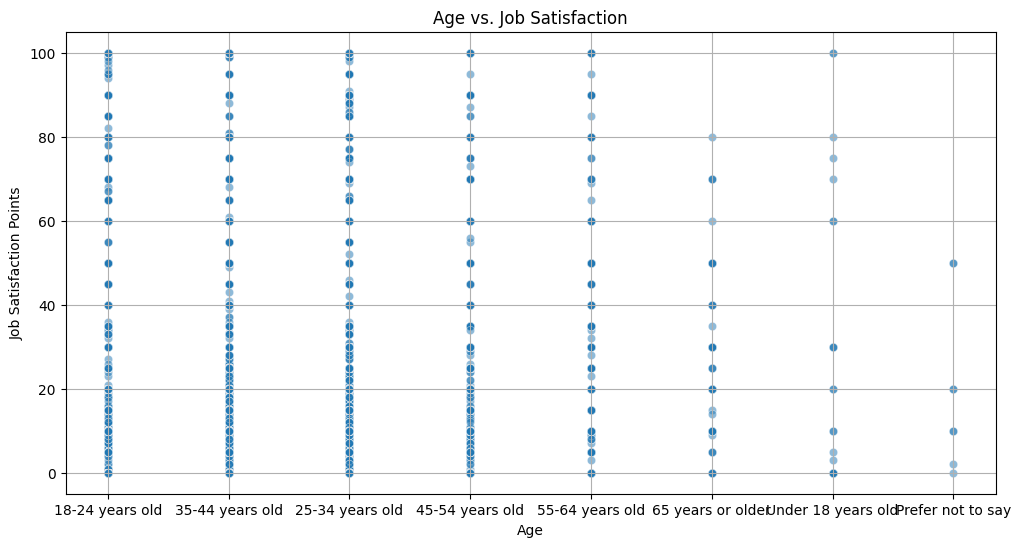

In [3]:
## Write your code here
df_clean = df.dropna(subset=['Age', 'JobSatPoints_6', 'ConvertedCompYearly', 'YearsCodePro', 'LanguageHaveWorkedWith', 'Employment', 'Country'])
plt.figure(figsize=(12, 6))
plt.scatter(df_clean['Age'], df_clean['JobSatPoints_6'], alpha=0.5, edgecolors='w', linewidth=0.5)
plt.title('Age vs. Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction Points')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


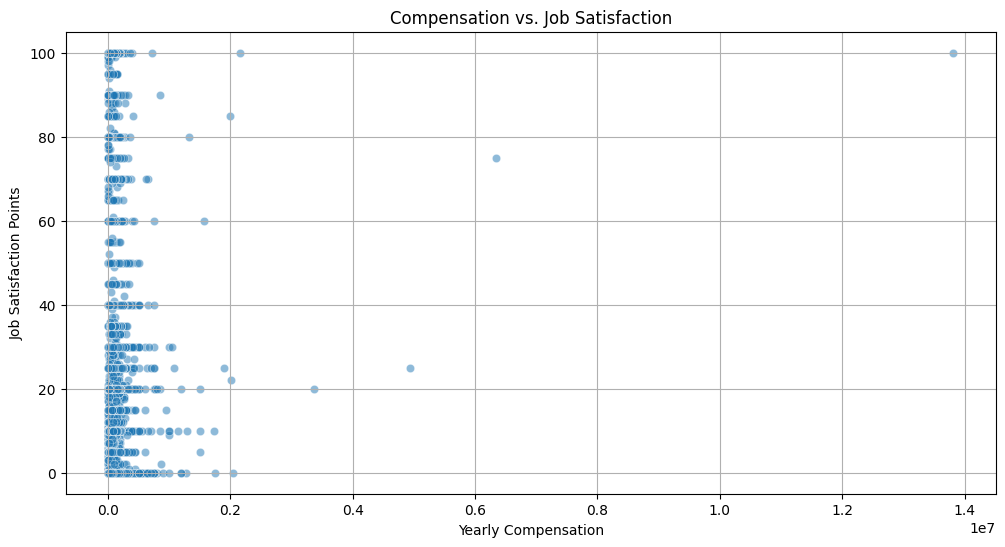

In [4]:
## Write your code here
plt.figure(figsize=(12, 6))
plt.scatter(df_clean['ConvertedCompYearly'], df_clean['JobSatPoints_6'], alpha=0.5, edgecolors='w', linewidth=0.5)
plt.title('Compensation vs. Job Satisfaction')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction Points')
plt.grid(True)
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


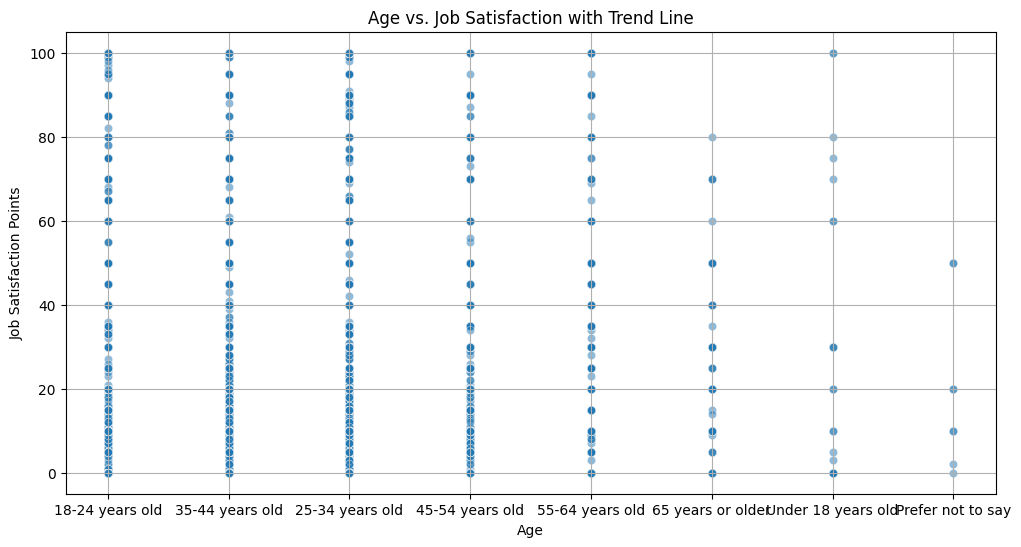

In [5]:
## Write your code here
plt.figure(figsize=(12, 6))
plt.scatter(df_clean['Age'], df_clean['JobSatPoints_6'], alpha=0.5, edgecolors='w', linewidth=0.5)
plt.title('Age vs. Job Satisfaction with Trend Line')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction Points')
plt.grid(True)

plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


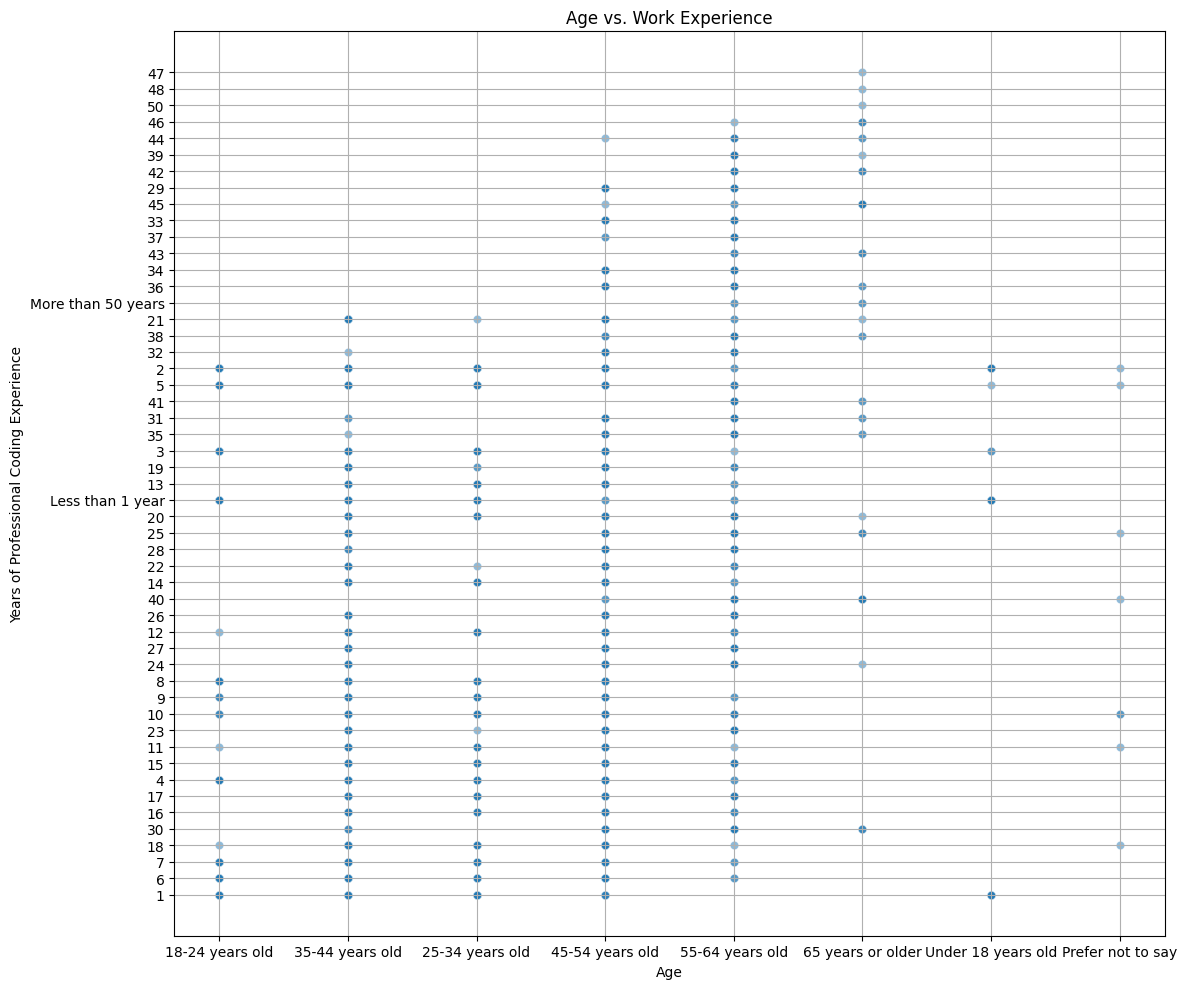

In [6]:
## Write your code here
plt.figure(figsize=(12, 10))
plt.scatter(df_clean['Age'], df_clean['YearsCodePro'], alpha=0.5, edgecolors='w', linewidth=0.5)
plt.title('Age vs. Work Experience')
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding Experience')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


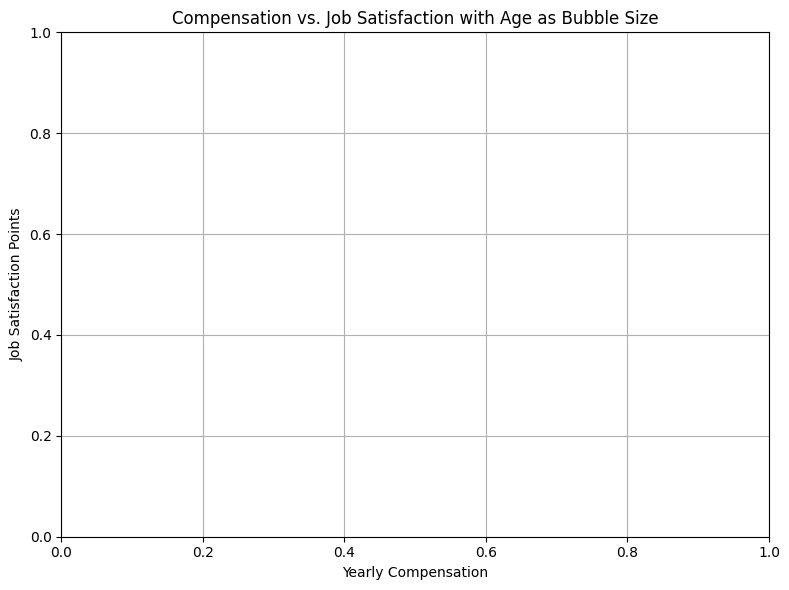

In [7]:
## Write your code here
plt.figure(figsize=(8, 6))

plt.title('Compensation vs. Job Satisfaction with Age as Bubble Size')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction Points')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [ ]:
## Write your code here

# Assuming df_clean is your cleaned DataFrame and 'LanguageHaveWorkedWith' is not null

# Extract unique languages
languages = df_clean['LanguageHaveWorkedWith'].dropna().str.split(',', expand=True).stack().str.strip().unique()

# Calculate average satisfaction per language
avg_satisfaction_by_language = {}
for language in languages:
    # Filter rows where the language is listed (regex=False to avoid warnings)
    language_data = df_clean[df_clean['LanguageHaveWorkedWith'].str.contains(language, na=False, regex=False)]
    avg_satisfaction_by_language[language] = language_data['JobSatPoints_6'].mean()

# Sort languages by satisfaction and take top 15
languages_sorted = sorted(avg_satisfaction_by_language.items(), key=lambda x: x[1], reverse=True)[:15]
languages_top, avg_satisfaction_top = zip(*languages_sorted)

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(languages_top, avg_satisfaction_top, color=plt.cm.viridis(np.linspace(0, 1, len(languages_top))))

plt.xlabel('Average Job Satisfaction Points')
plt.title('Top 15 Programming Languages by Average Job Satisfaction')
plt.gca().invert_yaxis()  # Highest satisfaction on top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Label bars with values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')


plt.show()



### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


In [ ]:
## Write your code here
plt.figure(figsize=(8, 6))
for employment_type in df_clean['Employment'].unique():
    subset = df_clean[df_clean['Employment'] == employment_type]
    plt.scatter(subset['ConvertedCompYearly'], subset['JobSatPoints_6'], label=employment_type, alpha=0.5, edgecolors='w', linewidth=0.5)
plt.title('Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction Points')
plt.legend(title='Employment Type')
plt.grid(True)

plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [ ]:
## Write your code here


# Assume df_clean already has Age and YearsCodePro cleaned (numeric)

# Create AgeGroup bins (you can adjust bins as needed)
age_bins = [20, 30, 40, 50, 60, 70, 100]  # Adjust max age as needed
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']

df_clean['AgeGroup'] = pd.cut(df_clean['Age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(12, 8))

# Use unique values of countries and age groups
countries = df_clean['Country'].dropna().unique()
age_groups = df_clean['AgeGroup'].dropna().unique()

markers = ['o', 's', '^', 'D', 'P', '*', 'X']  # Different markers for age groups
colors = plt.cm.get_cmap('tab10', len(countries))

for i, country in enumerate(countries):
    for j, age_group in enumerate(age_groups):
        subset = df_clean[(df_clean['Country'] == country) & (df_clean['AgeGroup'] == age_group)]
        if not subset.empty:
            plt.scatter(subset['YearsCodePro'], subset['Age'], 
                        label=f'{country} - {age_group}',
                        alpha=0.6, 
                        edgecolors='w', 
                        linewidth=0.5,
                        marker=markers[j % len(markers)], 
                        color=colors(i))

plt.title('Work Experience vs. Age Group by Country')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Age')
plt.legend(title='Country - Age Group', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True)

plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
